In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
from data_helpers import *
from implementations import ridge_regression

In [4]:
DATA_TRAIN_PATH = 'data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Feature Importance

[0.09817722 0.07142077 0.05969187 0.03241667 0.02544459 0.01318058
 0.00918011 0.05577636 0.03138116 0.03642476 0.05714661 0.06524667
 0.02190102 0.05000578 0.03074491 0.02722353 0.03285246 0.03154244
 0.02840619 0.0438146  0.02798461 0.03054529 0.01131857 0.02063541
 0.02409157 0.01703044 0.00666567 0.01339065 0.00887402 0.01748546]


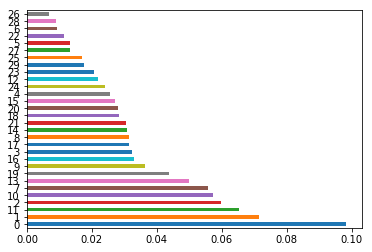

In [5]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(tX,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

## Correlation matrix

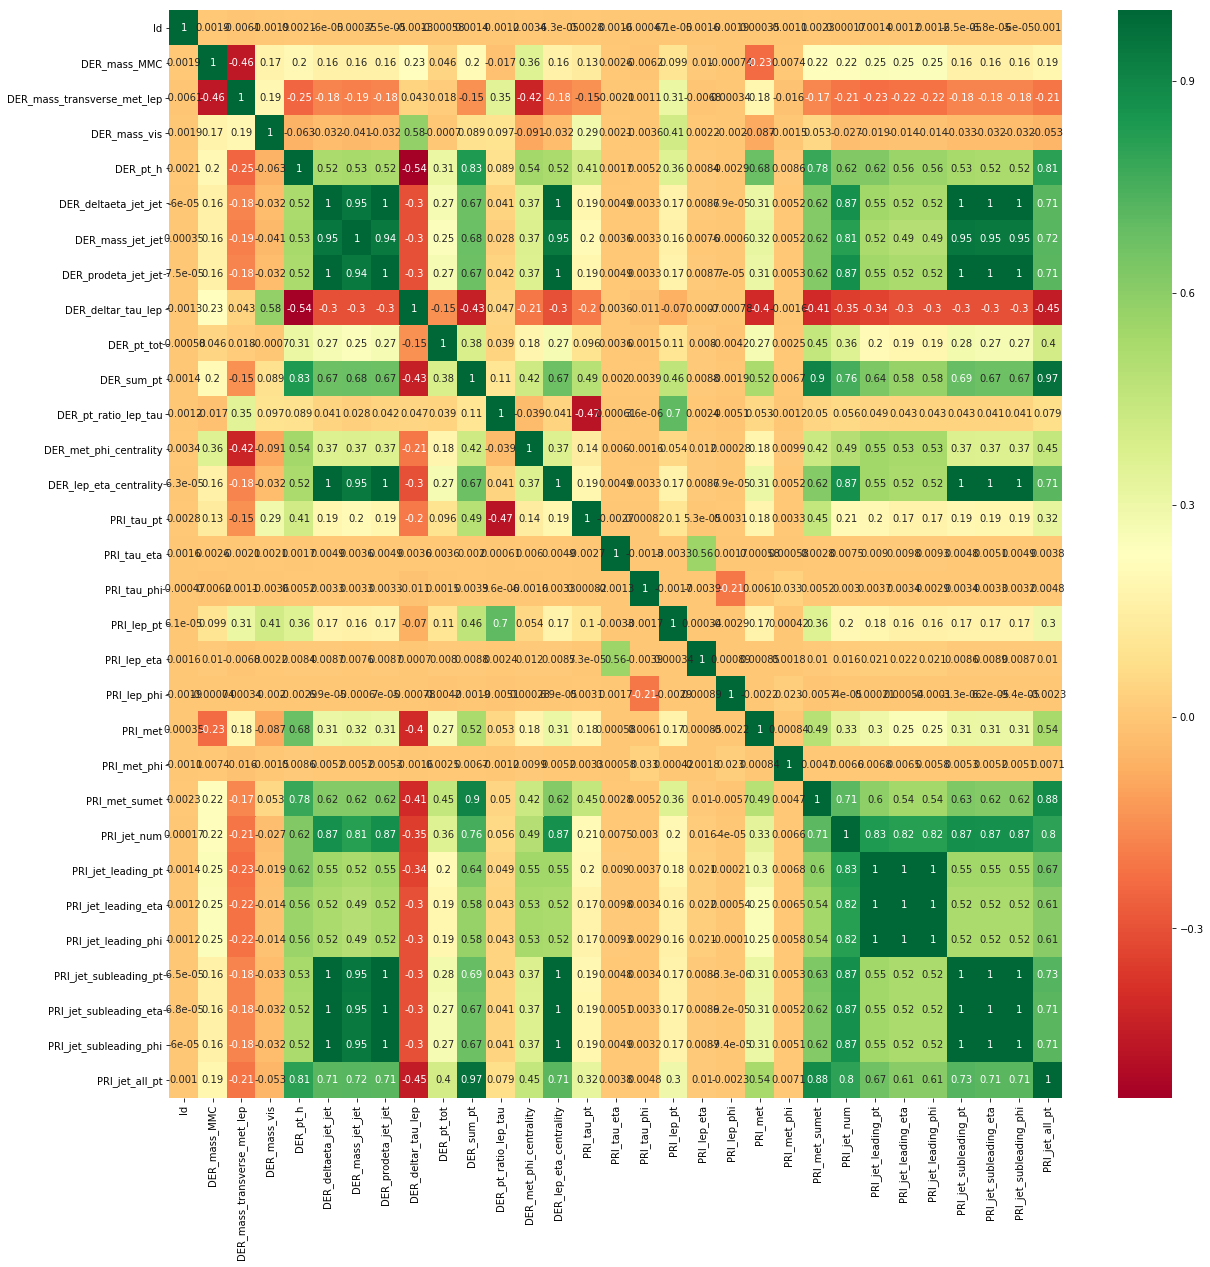

In [6]:
import pandas as pd
import seaborn as sns

data = pd.read_csv(DATA_TRAIN_PATH)
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Delete features 

In [7]:
#DATA PREPROCESSING : we try to limit the number of undefined values appearing in the datas 

#vire les colonnes avec features pas importantes ou les colonnes très corrélées entre elles
columns_bad_correl = [30, 29, 28, 27, 25, 24, 7, 6]
correl_ = np.delete(tX, columns_bad_correl, axis=1)

#vire les colonnes avec trop de undefined values
bounds = [0.2, 0.5]
tX_after, indices = treat_undefined_values(bounds, correl_)

/Users/Sofia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  """


In [5]:
#MODEL BUILDING
tx, mean, std = standardize(tX,0)
y, tx = build_model_data(tx,y)

In [6]:
num_samples = len(y)
num_features = tx.shape[1]

num_samples, num_features

(250000, 24)